In [1]:
from vivarium import Vivarium
from spatio_flux import PROCESS_DICT, TYPES_DICT

In [2]:
v = Vivarium(processes=PROCESS_DICT, types=TYPES_DICT)

In [3]:
v.get_types()

,Type
0,
1,mass^0_5/length^1_5
2,length^3*mass/current^2*time^4
3,length/time
4,current*time/mass
...,...
93,/substance
94,substance/length^3
95,positive_float
96,current*length^2*time


In [4]:
# view the available processes
v.get_processes()

,Process
0,MinimalParticle
1,ram-emitter
2,Particles
3,json-emitter
4,console-emitter
5,composite
6,DynamicFBA
7,DiffusionAdvection


In [5]:
# inspect the config schema for the 'increase' process
v.process_schema('DynamicFBA')

'(model_file:string|kinetic_params:map[tuple[float,float]]|substrate_update_reactions:map[string]|biomass_identifier:string|bounds:map[bounds])'

In [6]:
# add a dynamic FBA process called 'dFBA'
v.add_process(name="dFBA",
              process_id="DynamicFBA",
              config={
                "model_file": "textbook",
                "kinetic_params": {
                    "glucose": (0.5, 1),
                    "acetate": (0.5, 2)},
                "substrate_update_reactions": {
                    "glucose": "EX_glc__D_e",
                    "acetate": "EX_ac_e"},
                "biomass_identifier": "biomass",
                "bounds": {
                    "EX_o2_e": {"lower": -2, "upper": None},
                    "ATPM": {"lower": 1, "upper": 1}}},
              )


In [7]:
v.composite.composition['dFBA']

{'_type': 'process',
 '_default': 'default_edge',
 '_generate': 'generate_edge',
 '_apply': 'apply_process',
 '_serialize': 'serialize_process',
 '_deserialize': 'deserialize_process',
 '_dataclass': 'dataclass_edge',
 '_check': 'check_process',
 '_type_parameters': ['inputs', 'outputs'],
 '_description': '',
 'inputs': {'_type': 'wires',
  '_default': 'default_tree',
  '_generate': 'generate_tree',
  '_check': 'check_tree',
  '_slice': 'slice_tree',
  '_apply': 'apply_tree',
  '_serialize': 'serialize_tree',
  '_deserialize': 'deserialize_tree',
  '_dataclass': 'dataclass_tree',
  '_fold': 'fold_tree',
  '_divide': 'divide_tree',
  '_type_parameters': ['leaf'],
  '_description': 'mapping from str to some type in a potentially nested form',
  '_leaf': {'_type': 'path',
   '_default': [],
   '_check': 'check_list',
   '_slice': 'slice_list',
   '_apply': 'apply_path',
   '_serialize': 'serialize_list',
   '_deserialize': 'deserialize_list',
   '_dataclass': 'dataclass_list',
   '_fold':

In [8]:
v

Vivarium( 
{ 'dFBA': { 'address': 'local:DynamicFBA',
            'config': { 'biomass_identifier': 'biomass',
                        'bounds': { 'ATPM': {'lower': 1.0, 'upper': 1.0},
                                    'EX_o2_e': {'lower': -2.0, 'upper': None}},
                        'kinetic_params': { 'acetate': (0.5, 2.0),
                                            'glucose': (0.5, 1.0)},
                        'model_file': 'textbook',
                        'substrate_update_reactions': { 'acetate': 'EX_ac_e',
                                                        'glucose': 'EX_glc__D_e'}},
            'inputs': {},
            'instance': <spatio_flux.processes.dfba.DynamicFBA object at 0x177d7ccd0>,
            'interval': 1.0,
            'outputs': {},
            'shared': None},
  'global_time': 0.0})

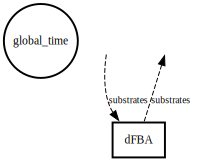

In [9]:
v.diagram(dpi='70')

In [10]:
mol_ids = ["glucose", "acetate", "biomass"]
path=["fields"]
i = 0
j = 0

def build_path(mol_id):
    base_path = path + [mol_id]
    if i is not None:
        base_path.append(i)
    if j is not None:
        base_path.append(j)
    return base_path

v.add_object(name="fields", type="array")
v.connect_process(
    process_name="dFBA",
    inputs={
            "substrates": {mol_id: build_path(mol_id) for mol_id in mol_ids}
        },
    outputs={
            "substrates": {mol_id: build_path(mol_id) for mol_id in mol_ids}
        }
)
v

Vivarium( 
{ 'dFBA': { 'address': 'local:DynamicFBA',
            'config': { 'biomass_identifier': 'biomass',
                        'bounds': { 'ATPM': {'lower': 1.0, 'upper': 1.0},
                                    'EX_o2_e': {'lower': -2.0, 'upper': None}},
                        'kinetic_params': { 'acetate': (0.5, 2.0),
                                            'glucose': (0.5, 1.0)},
                        'model_file': 'textbook',
                        'substrate_update_reactions': { 'acetate': 'EX_ac_e',
                                                        'glucose': 'EX_glc__D_e'}},
            'inputs': { 'substrates': { 'acetate': ['fields', 'acetate', 0, 0],
                                        'biomass': ['fields', 'biomass', 0, 0],
                                        'glucose': [ 'fields',
                                                     'glucose',
                                                     0,
                                             

In [11]:
v

Vivarium( 
{ 'dFBA': { 'address': 'local:DynamicFBA',
            'config': { 'biomass_identifier': 'biomass',
                        'bounds': { 'ATPM': {'lower': 1.0, 'upper': 1.0},
                                    'EX_o2_e': {'lower': -2.0, 'upper': None}},
                        'kinetic_params': { 'acetate': (0.5, 2.0),
                                            'glucose': (0.5, 1.0)},
                        'model_file': 'textbook',
                        'substrate_update_reactions': { 'acetate': 'EX_ac_e',
                                                        'glucose': 'EX_glc__D_e'}},
            'inputs': { 'substrates': { 'acetate': ['fields', 'acetate', 0, 0],
                                        'biomass': ['fields', 'biomass', 0, 0],
                                        'glucose': [ 'fields',
                                                     'glucose',
                                                     0,
                                             